In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [3]:
df = pd.read_csv('data.Mod1ProjData.csv')

In [33]:
df.head()

,Unnamed: 0,movie,title,id_y,release_date,production_budget,date,studio,year,domestic_gross,...,Comedy_gross,Western_gross,Thriller_gross,Talk-Show_gross,Musical_gross,Romance_gross,Sci-Fi_gross,Adult_gross,Adventure_gross,History_gross
0,0,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2.0,"May 20, 2011",410600000.0,2011-05-20,BV,2011.0,241063875.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,1.045664e+09,0.0
1,1,Avengers: Age of Ultron,Avengers: Age of Ultron,4.0,"May 1, 2015",330600000.0,2015-05-01,BV,2015.0,459005868.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.403014e+09,0.0,1.403014e+09,0.0
2,2,Avengers: Infinity War,Avengers: Infinity War,7.0,"Apr 27, 2018",300000000.0,2018-04-27,BV,2018.0,678815482.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.048134e+09,0.0,2.048134e+09,0.0
3,3,Justice League,Justice League,9.0,"Nov 17, 2017",300000000.0,2017-11-17,WB,2017.0,229024295.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,6.559452e+08,0.0
4,4,Spectre,Spectre,10.0,"Nov 6, 2015",300000000.0,2015-11-06,Sony,2015.0,200074175.0,...,0.0,0.0,879620923.0,0.0,0.0,0.0,0.000000e+00,0.0,8.796209e+08,0.0


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3859 entries, 0 to 3858
Columns: 111 entries, Unnamed: 0 to History_gross
dtypes: float64(60), int64(10), object(41)
memory usage: 3.3+ MB


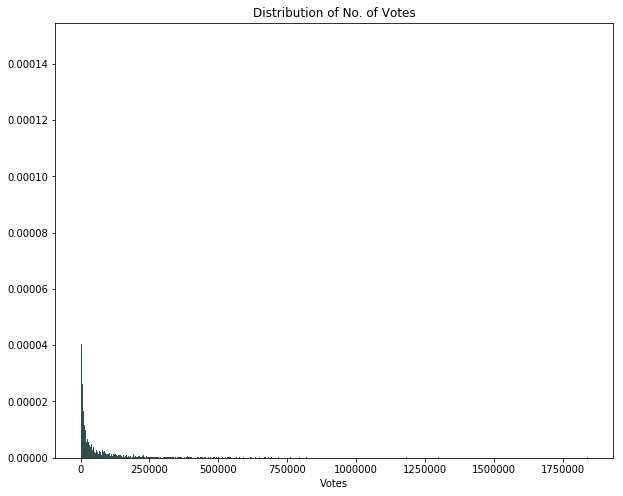

In [5]:
#Plotting to check the numvotes distribution
votes = df[(df.numvotes.notnull() == True)& (df.numvotes > 0)]

figure = plt.figure(figsize=(10, 8))
binwidth =0.1
axes = figure.add_subplot(1, 1, 1)
axes.hist(votes.numvotes, bins=1000, color="darkslategray", density = True)
axes.set_title("Distribution of No. of Votes")
axes.set_xlabel("Votes")

plt.show()
plt.close()

In [6]:
#transforming numvotes
votes = votes.loc[votes['numvotes'] > 0]
votes['log_votes'] = votes['numvotes'].apply(np.log)
votes['log_votes'].describe()

count    3574.000000
mean        8.869996
std         2.694771
min         1.609438
25%         7.312382
50%         9.248165
75%        10.920704
max        14.425855
Name: log_votes, dtype: float64

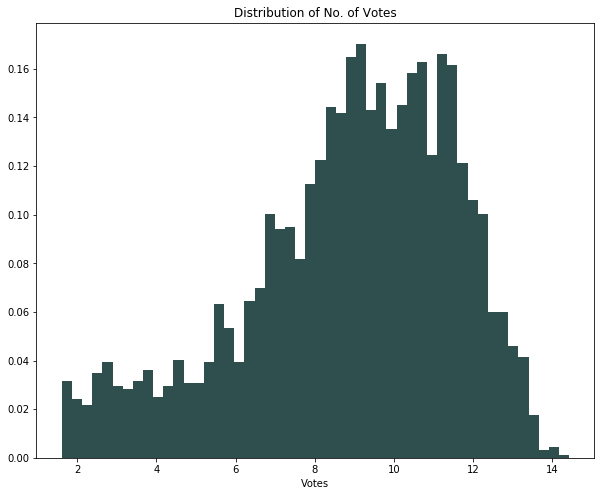

In [7]:
#checking the numvotes distribution
figure = plt.figure(figsize=(10, 8))
axes = figure.add_subplot(1, 1, 1)
axes.hist(votes.log_votes, bins=50, color="darkslategray", density = True)
axes.set_title("Distribution of No. of Votes")
axes.set_xlabel("Votes")

plt.show()
plt.close()

In [79]:
#minimum number of votes to consider movie
stats.mstats.mquantiles( votes.log_votes, [0.05, 0.95])

array([ 3.25809654, 12.53372818])

In [80]:
#Converting the 95% CI of the sample
np.exp(3.258)

25.997490132592233

In [9]:
df['gender_lead'] = 0
#fill actor & actress order value
df.actor_ordering = np.where(df.actor_ordering ==np.nan, df.actor_ordering.mean, df.actor_ordering)
df.actress_ordering = np.where(df.actress_ordering ==np.nan, df.actress_ordering.mean, df.actress_ordering)

In [10]:
df.head()

,Unnamed: 0,movie,title,id_y,release_date,production_budget,date,studio,year,domestic_gross,...,composer_age,archive_sound_age,cinematographer_age,actor_ordering,actress_ordering,actress_ratio,tconst_y,averagerating,numvotes,gender_lead
0,0,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2.0,"May 20, 2011",410600000.0,2011-05-20,BV,2011.0,241063875.0,...,NaN,NaN,NaN,2.66667,2,0.25,tt1298650,6.6,447624.0,0
1,1,Avengers: Age of Ultron,Avengers: Age of Ultron,4.0,"May 1, 2015",330600000.0,2015-05-01,BV,2015.0,459005868.0,...,NaN,NaN,NaN,2.5,NaN,0.00,tt2395427,7.3,665594.0,0
2,2,Avengers: Infinity War,Avengers: Infinity War,7.0,"Apr 27, 2018",300000000.0,2018-04-27,BV,2018.0,678815482.0,...,NaN,NaN,NaN,2.5,NaN,0.00,tt4154756,8.5,670926.0,0
3,3,Justice League,Justice League,9.0,"Nov 17, 2017",300000000.0,2017-11-17,WB,2017.0,229024295.0,...,NaN,NaN,NaN,2.66667,2,0.25,tt0974015,6.5,329135.0,0
4,4,Spectre,Spectre,10.0,"Nov 6, 2015",300000000.0,2015-11-06,Sony,2015.0,200074175.0,...,NaN,NaN,NaN,2.33333,3,0.25,tt2379713,6.8,352504.0,0


In [12]:
#creating a series for gender of lead actor/actress
df.gender_lead = np.where(df.actor_ordering < df.actress_ordering,'male', 'female')

#filling in missing world gross
df.worldwide_gross = np.where(df.worldwide_gross ==np.nan, df.worldwide_gross.mean(), df.worldwide_gross)

In [13]:
genres = ['Mystery', 'Drama',
       'Animation', 'Game-Show', 'News', 'Biography', 'Short', 'Action',
       'Family', 'Sport', 'Crime', 'War', 'Horror', 'Music', 'Reality-TV',
       'Fantasy', 'Documentary', 'Comedy', 'Western', 'Thriller', 'Talk-Show',
       'Musical', 'Romance', 'Sci-Fi', 'Adult', 'Adventure', 'History']

In [14]:
for genre in genres:
    df[(genre +'_gross')] = None

In [16]:
for genre in genres:
    df[(genre +'_gross')] = np.where(df[genre] == True, df.worldwide_gross, 0)

In [81]:
female_gross = df[(df.gender_lead == 'female')&(df.numvotes > 26)][['Mystery_gross',
 'Drama_gross',
 'Animation_gross',
 'Game-Show_gross',
 'News_gross',
 'Biography_gross',
 'Short_gross',
 'Action_gross',
 'Family_gross',
 'Sport_gross',
 'Crime_gross',
 'War_gross',
 'Horror_gross',
 'Music_gross',
 'Reality-TV_gross',
 'Fantasy_gross',
 'Documentary_gross',
 'Comedy_gross',
 'Western_gross',
 'Thriller_gross',
 'Talk-Show_gross',
 'Musical_gross',
 'Romance_gross',
 'Sci-Fi_gross',
 'Adult_gross',
 'Adventure_gross',
 'History_gross']]

In [82]:
male_gross = df[(df.gender_lead == 'male')&(df.numvotes > 26)][['Mystery_gross',
 'Drama_gross',
 'Animation_gross',
 'Game-Show_gross',
 'News_gross',
 'Biography_gross',
 'Short_gross',
 'Action_gross',
 'Family_gross',
 'Sport_gross',
 'Crime_gross',
 'War_gross',
 'Horror_gross',
 'Music_gross',
 'Reality-TV_gross',
 'Fantasy_gross',
 'Documentary_gross',
 'Comedy_gross',
 'Western_gross',
 'Thriller_gross',
 'Talk-Show_gross',
 'Musical_gross',
 'Romance_gross',
 'Sci-Fi_gross',
 'Adult_gross',
 'Adventure_gross',
 'History_gross']]

In [19]:
male_gross.head()

,Mystery_gross,Drama_gross,Animation_gross,Game-Show_gross,News_gross,Biography_gross,Short_gross,Action_gross,Family_gross,Sport_gross,...,Comedy_gross,Western_gross,Thriller_gross,Talk-Show_gross,Musical_gross,Romance_gross,Sci-Fi_gross,Adult_gross,Adventure_gross,History_gross
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.796209e+08,0.0,0.0,...,0.0,0.0,8.796209e+08,0.0,0.0,0.0,0.000000e+00,0.0,8.796209e+08,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.084439e+09,0.0,0.0,...,0.0,0.0,1.084439e+09,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.931513e+08,0.0,0.0,...,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,3.931513e+08,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.827781e+08,0.0,0.0,...,0.0,0.0,0.000000e+00,0.0,0.0,0.0,2.827781e+08,0.0,2.827781e+08,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.140069e+09,0.0,0.0,...,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.140069e+09,0.0,1.140069e+09,0.0


In [83]:
#computing the mean per genre per gender
for x in female_gross:
    female_gross[x]= female_gross[x].mean()
    male_gross[x]= male_gross[x].mean()

In [84]:
#generating an empty dataframe
genre_avg_gross_f=pd.DataFrame()
genre_avg_gross_m= pd.DataFrame()

In [85]:
genre_avg_gross_f = female_gross.iloc[0,:]
genre_avg_gross_m = male_gross.iloc[0,:]

In [86]:
genre_avg_gross_f

Mystery_gross        4.857939e+06
Drama_gross          2.959556e+07
Animation_gross      1.015696e+07
Game-Show_gross      0.000000e+00
News_gross           1.811068e+04
Biography_gross      4.878503e+06
Short_gross          0.000000e+00
Action_gross         3.206709e+07
Family_gross         4.823963e+06
Sport_gross          1.560591e+06
Crime_gross          5.583990e+06
War_gross            5.286555e+05
Horror_gross         4.913527e+06
Music_gross          2.455043e+06
Reality-TV_gross     0.000000e+00
Fantasy_gross        1.295833e+07
Documentary_gross    1.935953e+06
Comedy_gross         2.470226e+07
Western_gross        3.534792e+05
Thriller_gross       9.686351e+06
Talk-Show_gross      0.000000e+00
Musical_gross        8.838970e+05
Romance_gross        8.065968e+06
Sci-Fi_gross         1.001966e+07
Adult_gross          0.000000e+00
Adventure_gross      3.782452e+07
History_gross        2.145611e+06
Name: 0, dtype: float64

In [87]:
genre_avg_gross_m

Mystery_gross        4.007265e+06
Drama_gross          3.119645e+07
Animation_gross      1.632532e+07
Game-Show_gross      0.000000e+00
News_gross           0.000000e+00
Biography_gross      4.211507e+06
Short_gross          0.000000e+00
Action_gross         4.986847e+07
Family_gross         5.090433e+06
Sport_gross          6.198229e+05
Crime_gross          1.098977e+07
War_gross            6.118122e+04
Horror_gross         5.575320e+06
Music_gross          1.641415e+06
Reality-TV_gross     0.000000e+00
Fantasy_gross        9.498737e+06
Documentary_gross    1.624202e+05
Comedy_gross         3.264150e+07
Western_gross        7.337191e+05
Thriller_gross       1.655819e+07
Talk-Show_gross      0.000000e+00
Musical_gross        1.191612e+06
Romance_gross        4.419705e+06
Sci-Fi_gross         1.835642e+07
Adult_gross          0.000000e+00
Adventure_gross      4.893468e+07
History_gross        1.063463e+06
Name: 4, dtype: float64

In [88]:
#Renaming Indices to use as X-labels
genre_avg_gross_f.index = genre_avg_gross_f.index.str.replace('_gross', '')
genre_avg_gross_m.index = genre_avg_gross_m.index.str.replace('_gross', '')

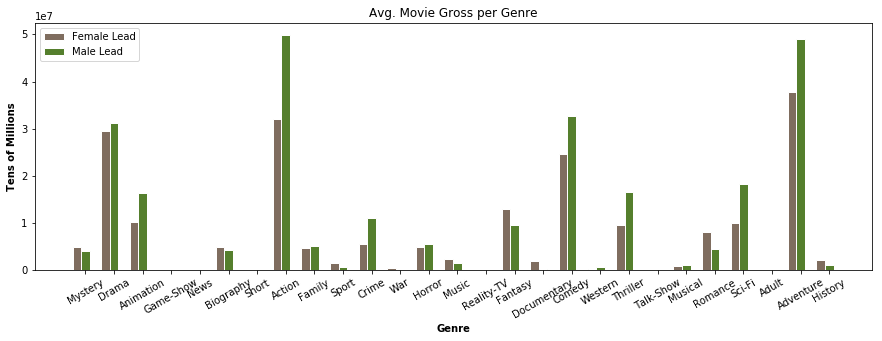

In [89]:
figure = plt.figure(figsize=(15, 10))
axes = figure.add_subplot(2, 1, 1)
# set width of bar
barWidth = 0.3
 
# set height of bar
bars1 = genre_avg_gross_f
bars2 = genre_avg_gross_m

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Female Lead')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Male Lead')

 
# Add xticks on the middle of the group bars
plt.xlabel('Genre', fontweight='bold')
plt.ylabel('Tens of Millions', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], list(genre_avg_gross_f.index))
axes.set_xticklabels(axes.get_xticklabels(),rotation=30)

plt.title('Avg. Movie Gross per Genre')
# Create legend & Show graphic
plt.legend()
plt.show()


## Movie Length based on votes and gross

In [90]:
df_run_gross = df[(df['numvotes']>25)]

In [91]:
df_run_gross = df[['worldwide_gross','runtime_minutes']]
df_run_gross.worldwide_gross = np.where(df_run_gross.worldwide_gross.isna() ==True, df_run_gross.worldwide_gross.mean(),df_run_gross.worldwide_gross)
df_run_gross.runtime_minutes = np.where(df_run_gross.runtime_minutes.isna() ==True, df_run_gross.runtime_minutes.mean(),df_run_gross.runtime_minutes)
df_run_gross.head()

/home/allan/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,worldwide_gross,runtime_minutes
0,1.045664e+09,136.0
1,1.403014e+09,141.0
2,2.048134e+09,149.0
3,6.559452e+08,120.0
4,8.796209e+08,148.0


In [92]:
df.isna().sum().sort_values().tail(20)

actress_ordering            748
Drama_gross                 812
actor_age                   851
actress_age                1245
worldwide_gross            1327
director_age               1639
release_date               2046
production_budget          2046
id_y                       2046
movie                      2046
date                       2046
producer_age               2406
writer_age                 2503
composer_age               2869
cinematographer_age        3317
editor_age                 3666
self_age                   3719
archive_footage_age        3818
production_designer_age    3824
archive_sound_age          3858
dtype: int64

In [93]:
df_with_budget = df[df.production_budget.notnull()]

In [94]:
df_with_budget.head()

,Unnamed: 0,movie,title,id_y,release_date,production_budget,date,studio,year,domestic_gross,...,Comedy_gross,Western_gross,Thriller_gross,Talk-Show_gross,Musical_gross,Romance_gross,Sci-Fi_gross,Adult_gross,Adventure_gross,History_gross
0,0,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2.0,"May 20, 2011",410600000.0,2011-05-20,BV,2011.0,241063875.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,1.045664e+09,0.0
1,1,Avengers: Age of Ultron,Avengers: Age of Ultron,4.0,"May 1, 2015",330600000.0,2015-05-01,BV,2015.0,459005868.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.403014e+09,0.0,1.403014e+09,0.0
2,2,Avengers: Infinity War,Avengers: Infinity War,7.0,"Apr 27, 2018",300000000.0,2018-04-27,BV,2018.0,678815482.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.048134e+09,0.0,2.048134e+09,0.0
3,3,Justice League,Justice League,9.0,"Nov 17, 2017",300000000.0,2017-11-17,WB,2017.0,229024295.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,6.559452e+08,0.0
4,4,Spectre,Spectre,10.0,"Nov 6, 2015",300000000.0,2015-11-06,Sony,2015.0,200074175.0,...,0.0,0.0,879620923.0,0.0,0.0,0.0,0.000000e+00,0.0,8.796209e+08,0.0


In [63]:
list(df_with_budget.columns)

['Unnamed: 0',
 'movie',
 'title',
 'id_y',
 'release_date',
 'production_budget',
 'date',
 'studio',
 'year',
 'domestic_gross',
 'worldwide_gross',
 'title_id',
 'festival',
 'D3',
 'IMAX',
 'title_y',
 'region',
 'language',
 'types',
 'attributes',
 'tconst_x',
 'primary_title',
 'original_title',
 'start_year',
 'runtime_minutes',
 'genres',
 'Adventure',
 'Action',
 'Horror',
 'Sci-Fi',
 'Fantasy',
 'History',
 'Sport',
 'Biography',
 'Musical',
 'Game-Show',
 'Mystery',
 'Crime',
 'Short',
 'Talk-Show',
 'Thriller',
 'Drama',
 'Reality-TV',
 'Adult',
 'Animation',
 'Documentary',
 'Family',
 'Western',
 'War',
 'Romance',
 'News',
 'Comedy',
 'Music',
 'archive_sound',
 'writer',
 'producer',
 'actress',
 'director',
 'composer',
 'cinematographer',
 'self',
 'editor',
 'production_designer',
 'actor',
 'archive_footage',
 'archive_footage_age',
 'editor_age',
 'director_age',
 'actor_age',
 'production_designer_age',
 'actress_age',
 'writer_age',
 'self_age',
 'producer_age',

In [99]:
df_with_budget['Profit_Margin'] = (df_with_budget.worldwide_gross/df_with_budget.production_budget)*100

/home/allan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [100]:
df_with_budget.Profit_Margin.describe()

count     1813.000000
mean       453.166622
std       1214.474338
min          0.000000
25%        118.596690
50%        246.732013
75%        442.391321
max      41656.474000
Name: Profit_Margin, dtype: float64

/home/allan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/allan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


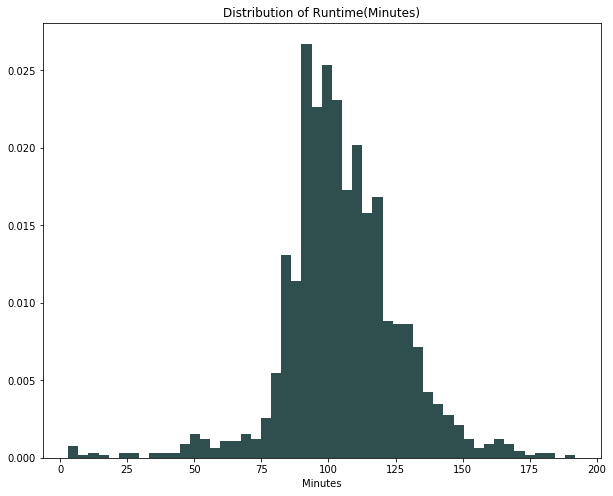

In [95]:
#checking the runtime distribution
figure = plt.figure(figsize=(10, 8))
axes = figure.add_subplot(1, 1, 1)
axes.hist(df_with_budget.runtime_minutes, bins=50, color="darkslategray", density = True)
axes.set_title("Distribution of Runtime(Minutes)")
axes.set_xlabel("Minutes")

plt.show()
plt.close()

In [97]:
stats.mstats.mquantiles( df_with_budget.runtime_minutes, [0.25, 0.50,0.75])

array([ 93., 105., 119.])

/home/allan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/allan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


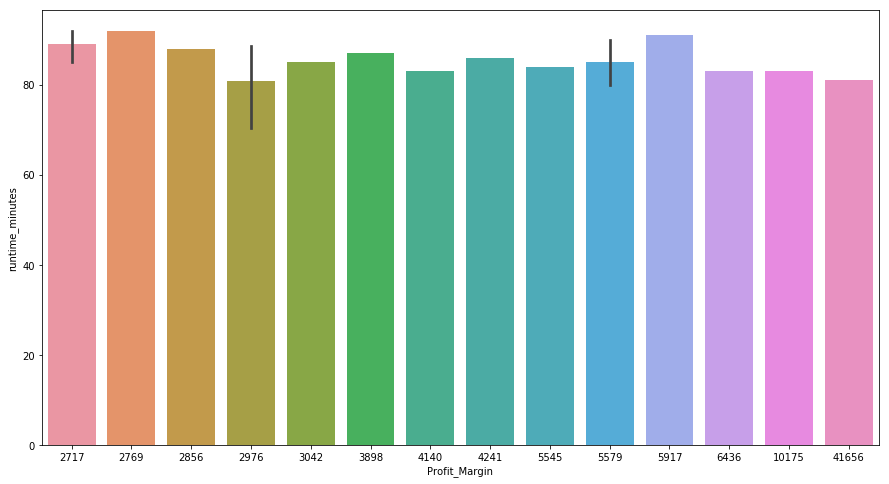

In [117]:
#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(y=df_with_budget[df.runtime_minutes<93]['runtime_minutes'], x=df_with_budget[df.runtime_minutes<93].Profit_Margin.sort_values(ascending=False).head(20).astype(int), data = df_with_budget, ax=ax)

/home/allan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/allan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


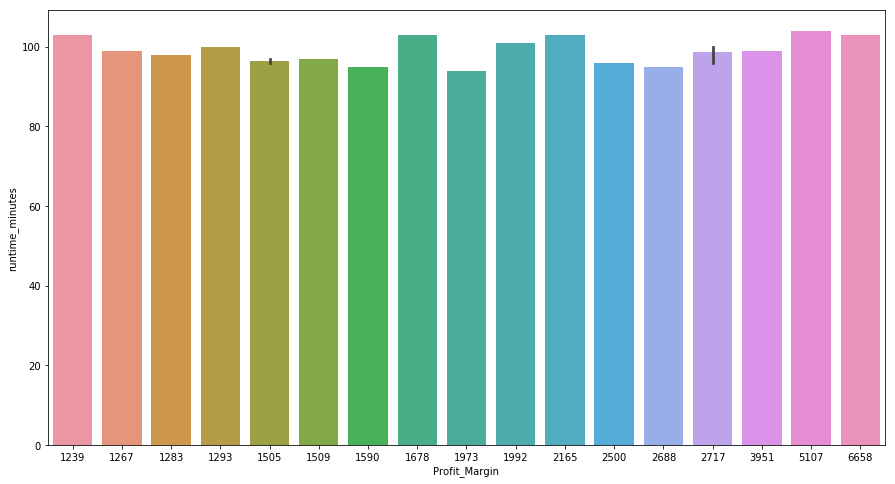

In [118]:
#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(y=df_with_budget[(df.runtime_minutes>93)&(df.runtime_minutes<105)]['runtime_minutes'], x=df_with_budget[(df.runtime_minutes>93)&(df.runtime_minutes<105)].Profit_Margin.sort_values(ascending=False).head(20).astype(int), data = df_with_budget, ax=ax)

/home/allan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/allan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


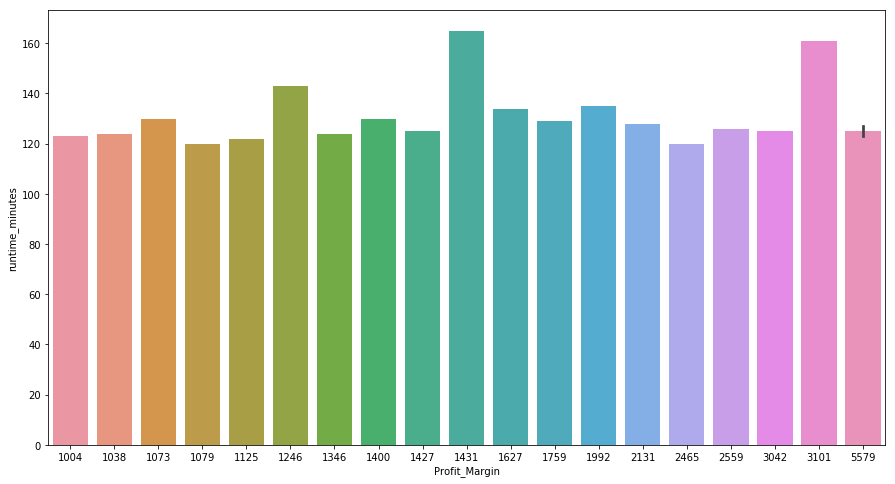

In [120]:
#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(y=df_with_budget[df.runtime_minutes>119]['runtime_minutes'], x=df_with_budget[df.runtime_minutes>119].Profit_Margin.sort_values(ascending=False).head(20).astype(int), data = df_with_budget, ax=ax)

# Overall Runtime vs Top 10 Profit Margin

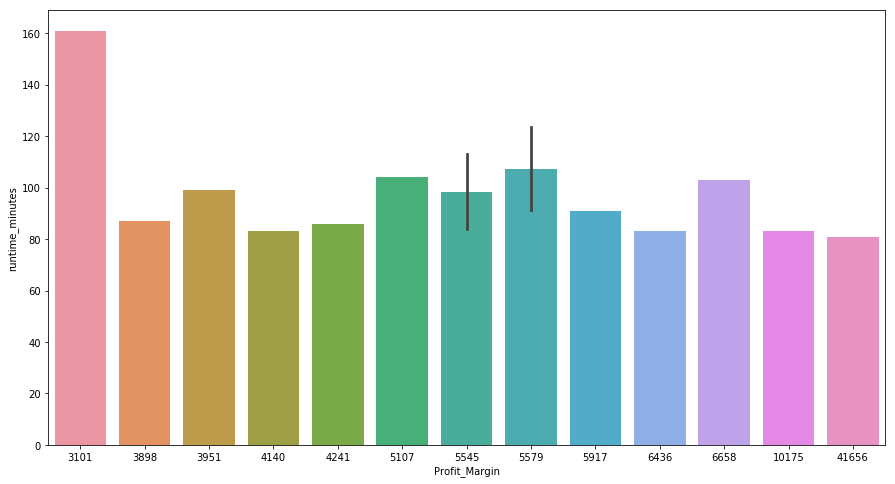

In [126]:
#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(y=df_with_budget.runtime_minutes, x=df_with_budget.Profit_Margin.sort_values(ascending=False).head(20).astype(int), data = df_with_budget, ax=ax)

# actor/actress age for lead

In [61]:
df_lead_age = df[['actor_ordering','actor_age','actress_ordering','actress_age','year']]

In [62]:
df_lead_age.isna().sum()

actor_ordering       369
actor_age            785
actress_ordering     687
actress_age         1150
year                   0
dtype: int64

In [63]:
df_lead_age.actor_ordering = np.where(df_lead_age.actor_ordering.isna()==True, df_lead_age.actor_ordering.mean(),df_lead_age.actor_ordering)
df_lead_age.actress_ordering = np.where(df_lead_age.actress_ordering.isna()==True, df_lead_age.actress_ordering.mean(),df_lead_age.actress_ordering )
df_lead_age.actor_age = np.where(df_lead_age.actor_age.isna()==True, df_lead_age.actor_age.mean(),df_lead_age.actor_age)
df_lead_age.actress_age = np.where(df_lead_age.actress_age.isna()==True, df_lead_age.actress_age.mean(),df_lead_age.actress_age )

/home/allan/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [64]:
df_lead_age.head()

,actor_ordering,actor_age,actress_ordering,actress_age,year
0,2.33333,1962.666667,3,1986.000000,2016
1,1.5,1982.000000,3.5,1982.000000,2012
2,2.66667,1962.666667,2,1968.000000,2014
3,2,1965.000000,3,1973.000000,2013
4,2.5,1972.500000,2.61128,1976.650717,2014


In [65]:
df_lead_age['actor_age_of_role'] = df_lead_age.year - df_lead_age.actor_age
df_lead_age['actress_age_of_role'] = df_lead_age.year - df_lead_age.actress_age
df_lead_age.head()

/home/allan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/allan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,actor_ordering,actor_age,actress_ordering,actress_age,year,actor_age_of_role,actress_age_of_role
0,2.33333,1962.666667,3,1986.000000,2016,53.333333,30.000000
1,1.5,1982.000000,3.5,1982.000000,2012,30.000000,30.000000
2,2.66667,1962.666667,2,1968.000000,2014,51.333333,46.000000
3,2,1965.000000,3,1973.000000,2013,48.000000,40.000000
4,2.5,1972.500000,2.61128,1976.650717,2014,41.500000,37.349283


In [66]:
df_lead_age['lead_gender'] = 0
df_lead_age['lead_gender'] = np.where(df_lead_age.actress_ordering<df_lead_age.actor_ordering, 'female', df_lead_age.lead_gender)
df_lead_age['lead_gender'] = np.where(df_lead_age.actress_ordering>df_lead_age.actor_ordering, 'male', df_lead_age.lead_gender)
df_lead_age.head()


/home/allan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/allan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/allan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,actor_ordering,actor_age,actress_ordering,actress_age,year,actor_age_of_role,actress_age_of_role,lead_gender
0,2.33333,1962.666667,3,1986.000000,2016,53.333333,30.000000,male
1,1.5,1982.000000,3.5,1982.000000,2012,30.000000,30.000000,male
2,2.66667,1962.666667,2,1968.000000,2014,51.333333,46.000000,female
3,2,1965.000000,3,1973.000000,2013,48.000000,40.000000,male
4,2.5,1972.500000,2.61128,1976.650717,2014,41.500000,37.349283,male


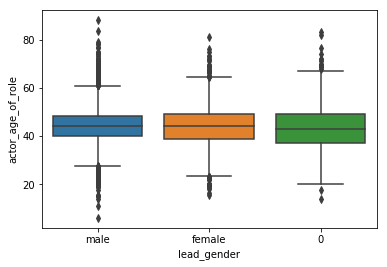

In [69]:
sns.boxplot(df_lead_age.lead_gender, df_lead_age.actor_age_of_role)